Analyse Exploratoire des Données des Arbres de Paris

Présentation Générale du Jeu de Données
Le jeu de données contient des informations sur les arbres situés dans la ville de Paris. Chaque ligne représente un arbre avec des attributs tels que l'espèce, la hauteur, la circonférence, etc.

Démarche Méthodologique d'Analyse de Données
1. Chargement et compréhension des données
2. Nettoyage des données
3. Analyse exploratoire des données (EDA)
4. Visualisation des données
5. Synthèse et propositions

1) Chargement et compréhension générale des données

A) installation des librairies Python nécessaires et chargement des données pour réaliser le projet

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations pour les graphiques
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# Lecture du fichier de données présent dans le dossier
data = pd.read_csv('p2-arbres-fr.csv', delimiter=';')

# Affichage des premières lignes du jeu de données pour vérifier le chargement
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


B) Présentation générale du jeu de données : nombre de lignes et de colonnes, types de données pour chaque colonne

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

C) Variables quantitatives

In [4]:
# Statistiques descriptives utilisées pour résumer et comprendre les caractéristiques d'un jeu de données
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


Count fait référence au nombre total d'observations ou d'éléments dans un jeu de données pour une colonne donnée (sauf NaN).
Mean est la moyenne arithmétique des valeurs d'une colonne. 
Std, ou l'écart type, mesure la dispersion ou la variabilité des valeurs par rapport à la moyenne. Un écart type élevé indique que les valeurs sont largement dispersées autour de la moyenne, tandis qu'un écart type faible indique que les valeurs sont proches de la moyenne.
Min (Max) : valeur la plus petite (grande) d'une colonne.
Les quartiles sont des valeurs qui divisent un ensemble de données en quatre parts égales, chacune contenant 25% des données.

- Id : identifiant, valeurs uniques
- numéro : toutes les valeurs sont manquantes
- circonférence et hauteur : écart-type très élevé, présence de valeurs aberrantes
- remarquable : 2 valeurs possibles (0 ou 1) -> variable catégorielle 
- geo point  : écart-type très faible, absence de valeurs aberrantes


D) Variables qualitatives

In [5]:
# Sélectionner uniquement les colonnes non quantitatives (de type 'object')
non_quant_columns = data.select_dtypes(include=['object'])

# Afficher les premières lignes des colonnes non quantitatives
non_quant_columns.head()

,type_emplacement,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,stade_developpement
0,Arbre,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,NaN
1,Arbre,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,A
2,Arbre,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,A
3,Arbre,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,A
4,Arbre,Jardin,PARIS 17E ARRDT,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,NaN


11 variables qualitatives : 6 variables liées à l’emplacement et 5 variables liées à l’espèce

- type_emplacement : valeur constante (arbre) ;
- domanialité (type de lieu où se trouve l'arbre), arrondissement, complement_adresse, lieu, id_emplacement (cardinalité très élevée) décrivent les lieux de localisation des arbres ;
- libelle_francais : nom français du type d'arbre ;
- genre, espece, variété : différentes nominations supplémentaires pour les arbres ;
- stade_developpement : jeune / Jeune Adulte / Adulte / Mature

2. Nettoyage des données

A) variables inutiles

A partir de la présentation des données et des analyses univariées, on peut déjà déduire que certaines données ne seront pas utiles à notre analyse.

En effet, les données suivantes seront exclues de l'analyse pour différentes raisons :
id : identifiants des arbres ; 
type_emplacement : valeur constante (arbre) ;
complement_adresse : cardinalité très élevée et pourcentage valeurs manquantes élevé ;
id_emplacement : inutile.

In [6]:
# Utilisation de la méthode drop pour supprimer les colonnes inutiles
# Liste des colonnes à supprimer
columns_to_drop = ['id', 'type_emplacement', 'complement_addresse', 'id_emplacement']

# Supprimer les colonnes inutiles
data_cleaned = data.drop(columns=columns_to_drop)

# Vérifier que les colonnes ont été supprimées
data_cleaned.head()

,domanialite,arrondissement,numero,lieu,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,Jardin,PARIS 17E ARRDT,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


B) Variables nulles

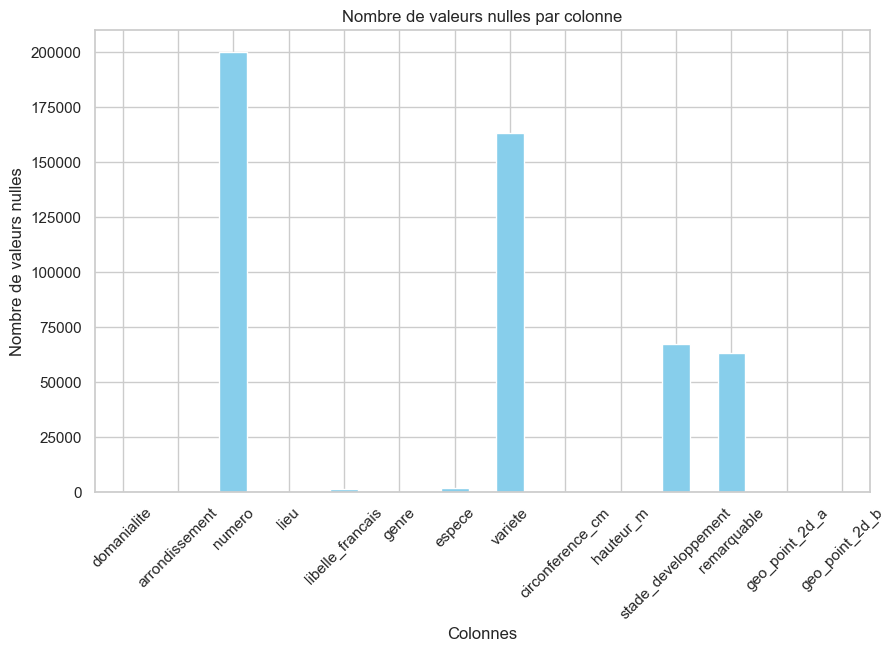

                     Null Percentage
domanialite                 0.000500
arrondissement              0.000000
numero                    100.000000
lieu                        0.000000
libelle_francais            0.747988
genre                       0.007995
espece                      0.875400
variete                    81.624088
circonference_cm            0.000000
hauteur_m                   0.000000
stade_developpement        33.579498
remarquable                31.527404
geo_point_2d_a              0.000000
geo_point_2d_b              0.000000


In [7]:
# Calculer le nombre de valeurs nulles dans chaque colonne
null_counts = data_cleaned.isnull().sum()

# Création d'un graphique à barres
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre de valeurs nulles par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs nulles')
plt.xticks(rotation=45)
plt.show()

# Calculer le nombre total de valeurs dans chaque colonne
total_counts = data_cleaned.shape[0]

# Calculer le taux de valeurs nulles pour chaque colonne
null_percentage = (null_counts / total_counts) * 100

# Créer un DataFrame pour afficher les taux de valeurs nulles
null_percentage_df = pd.DataFrame({'Null Percentage': null_percentage})

# Afficher le DataFrame
print(null_percentage_df)

Les colonnes numero et variete présentent des taux de valeurs manquantes particulièrement importantes, respectivement 100% et 81%, ce qui les rend inexploitables.

In [8]:
#traitement des variables avec un taux de valeurs manquantes trop important
# Supprimer les colonnes numero et variete du DataFrame
data_cleaned = data_cleaned.drop(columns=['numero', 'variete'])

# Vérifier que les colonnes ont été supprimées
print(data_cleaned.columns)

Index(['domanialite', 'arrondissement', 'lieu', 'libelle_francais', 'genre',
       'espece', 'circonference_cm', 'hauteur_m', 'stade_developpement',
       'remarquable', 'geo_point_2d_a', 'geo_point_2d_b'],
      dtype='object')


La colonne remarquable donne des informations importantes, toutefois, elle présente un taux de valeurs manquantes important. Il faut donc apporter une réponse tout en conservant les valeurs existantes disponibles. Etant donné qu'il est plus probable qu'un arbre ne soit pas remarquable, il a été décidé de remplacer les valeurs manquantes de cette colonne par "Non".

In [9]:
# Convertir en chaînes de caractères, en minuscules et nettoyer les espaces
data_cleaned['remarquable'] = data_cleaned['remarquable'].astype(str).str.lower().str.strip()

# Transformer les valeurs 0 en 'non' et 1 en 'oui'
data_cleaned['remarquable'] = data_cleaned['remarquable'].replace({'0.0': 'non', 'nan' : 'non', '1.0': 'oui'})

# Vérifiez les valeurs uniques dans la colonne 'remarquable'
print("Valeurs uniques dans la colonne 'remarquable':")
print(data_cleaned['remarquable'].unique())

# Vérifier que les valeurs nulles ont été remplacées
print(data_cleaned['remarquable'].isnull().sum())  # Devrait imprimer 0 si toutes les valeurs nulles ont été remplacées

Valeurs uniques dans la colonne 'remarquable':
['non' 'oui']
0


Approche métier pour supprimer des valeurs aberrantes

Le plus grand arbre en France mesure 66 mètres de hauteur et l'arbre le plus large a une circonférence de 13 mètres. Les arbres dont la hauteur ou la circonférence dépassent ces données doivent faire l'objet d'un traitement.


In [10]:
#création d'une fonction pour remplacer les valeurs aberrantes par la médiane de groupe
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

def replace_outliers_with_group_median(dataframe, group_col, target_col, upper_limit):
    # Calculate group medians
    group_medians = dataframe.groupby(group_col)[target_col].transform('median')
    
    # Replace values that are above the upper limit with group medians
    dataframe[target_col] = np.where(dataframe[target_col] > upper_limit, group_medians, dataframe[target_col])
    
    return dataframe

In [11]:
# Remplacer les valeurs aberrantes de circonference_cm et hauteur_m par la médiane de leur groupe
data_cleaned = replace_outliers_with_group_median(data_cleaned, 'libelle_francais', 'circonference_cm', 1400)  # 14 mètres convertis en cm
data_cleaned = replace_outliers_with_group_median(data_cleaned, 'libelle_francais', 'hauteur_m', 67)

# Vérifier le nombre de valeurs supérieures aux limites après traitement
print((data_cleaned['circonference_cm'] > 1400).sum())
print((data_cleaned['hauteur_m'] > 67).sum())

# Afficher des statistiques descriptives pour s'assurer que les remplacements ont été effectués correctement
print(data_cleaned[['circonference_cm', 'hauteur_m']].describe())

0
0
       circonference_cm      hauteur_m
count     200136.000000  200137.000000
mean          79.863028       8.357772
std           64.863088       6.301715
min            0.000000       0.000000
25%           30.000000       5.000000
50%           70.000000       8.000000
75%          115.000000      12.000000
max         1360.000000      67.000000


Approche technique pour supprimer les valeurs aberrantes

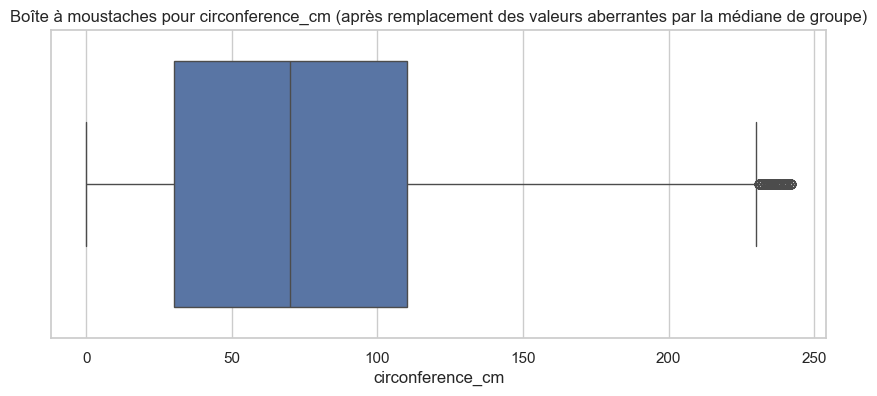

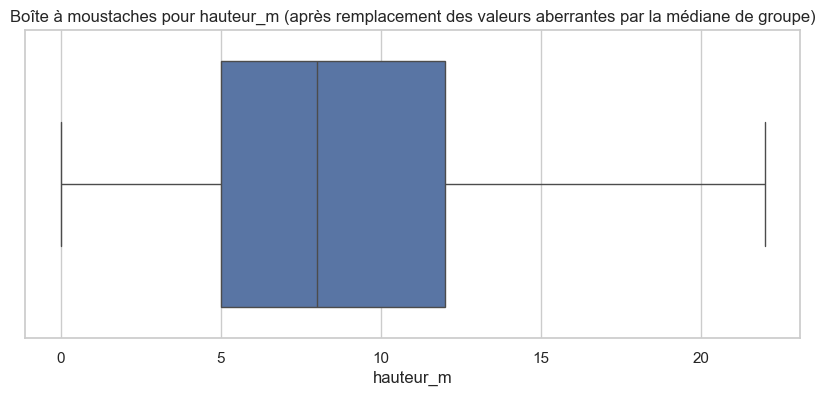

In [12]:
# Fonction pour remplacer les valeurs aberrantes par la médiane de groupe
def replace_outliers_with_group_median(data_cleaned, group_col, target_cols):
    for column in target_cols:
        Q1 = data_cleaned[column].quantile(0.25)
        Q3 = data_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Détecter les valeurs aberrantes
        outliers = (data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)

        # Calculer la médiane de groupe
        group_medians = data_cleaned.groupby(group_col)[column].transform('median')

        # Calculer la médiane globale
        global_median = data_cleaned[column].median()

        # Remplacer les valeurs aberrantes par la médiane de groupe, fallback à la médiane globale
        data_cleaned[column] = np.where(outliers, np.nan, data_cleaned[column])
        data_cleaned[column] = data_cleaned[column].fillna(group_medians)
        data_cleaned[column] = data_cleaned[column].fillna(global_median)

    return data_cleaned

# Appliquer la fonction aux colonnes 'circonference_cm' et 'hauteur_m'
target_columns = ['circonference_cm', 'hauteur_m']
data_cleaned = replace_outliers_with_group_median(data_cleaned, 'libelle_francais', target_columns)

# Afficher les boîtes à moustaches après le remplacement des valeurs aberrantes
for column in target_columns:
    if data_cleaned[column].dropna().shape[0] > 0:  # Vérifier s'il y a des valeurs non-NaN dans la colonne
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=data_cleaned[column])
        plt.title(f'Boîte à moustaches pour {column} (après remplacement des valeurs aberrantes par la médiane de groupe)')
        plt.show()
    else:
        print(f"La colonne {column} ne contient que des NaN après le remplacement des valeurs aberrantes.")

3. Analyse exploratoire des données (EDA)

In [13]:
# Analyse des variables quantitatives
# Calcul des statistiques descriptives
quantitative_columns = data_cleaned.select_dtypes(include=[np.number]).columns

# Affichage des statistiques descriptives
data_cleaned[quantitative_columns].describe().T

# Filtrer le DataFrame pour les lignes où 'remarquable' est 'oui'
remarquable_oui = data_cleaned[data_cleaned['remarquable'] == 'oui']

# Afficher les premières lignes du DataFrame filtré
print("Premières lignes du tableau filtré où 'remarquable' est 'OUI':")
remarquable_oui.head()

Premières lignes du tableau filtré où 'remarquable' est 'OUI':


,domanialite,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
736,Jardin,PARIS 12E ARRDT,PARC DE BERCY,Platane,Platanus,x hispanica,96.0,12.0,M,oui,48.834162,2.382554
1626,Jardin,PARIS 19E ARRDT,PARC DES BUTTES CHAUMONT,Sophora,Sophora,japonica,77.0,12.0,M,oui,48.881469,2.383680
1867,Jardin,PARIS 19E ARRDT,PARC DES BUTTES CHAUMONT,Marronnier,Aesculus,hippocastanum,100.0,22.0,M,oui,48.880080,2.385710
1868,Jardin,PARIS 19E ARRDT,PARC DES BUTTES CHAUMONT,Marronnier,Aesculus,hippocastanum,100.0,10.0,M,oui,48.880116,2.385667
1889,Jardin,PARIS 19E ARRDT,PARC DES BUTTES CHAUMONT,Arbre aux quarante écus,Ginkgo,biloba,50.0,7.0,A,oui,48.882322,2.384088


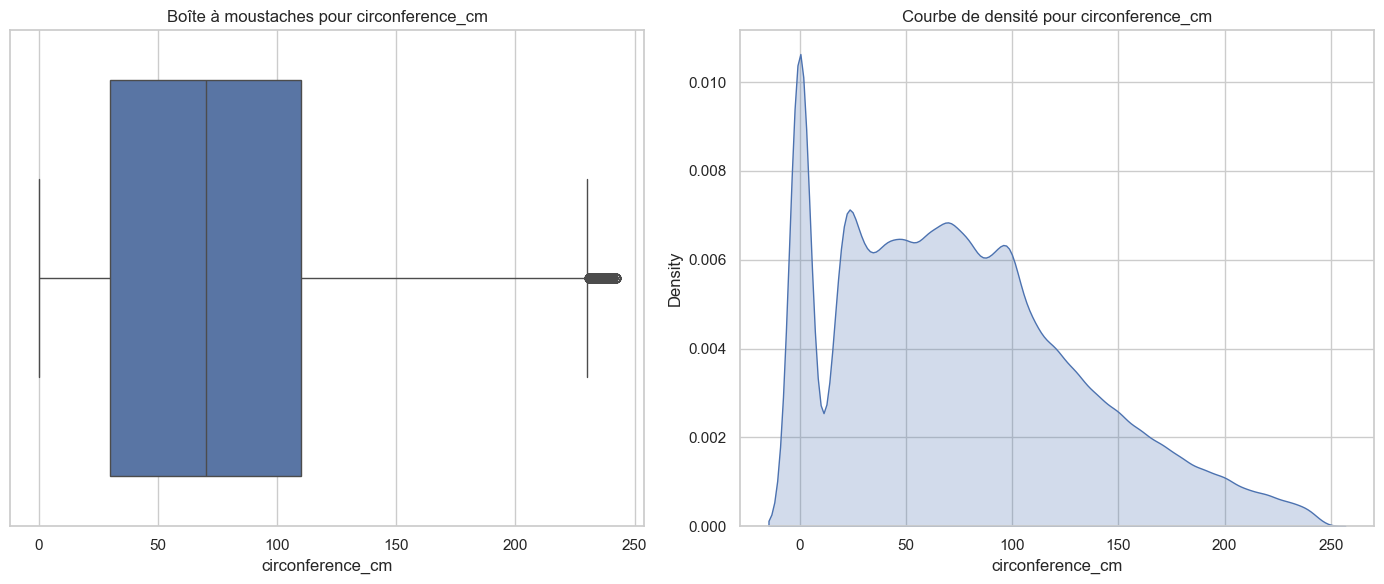

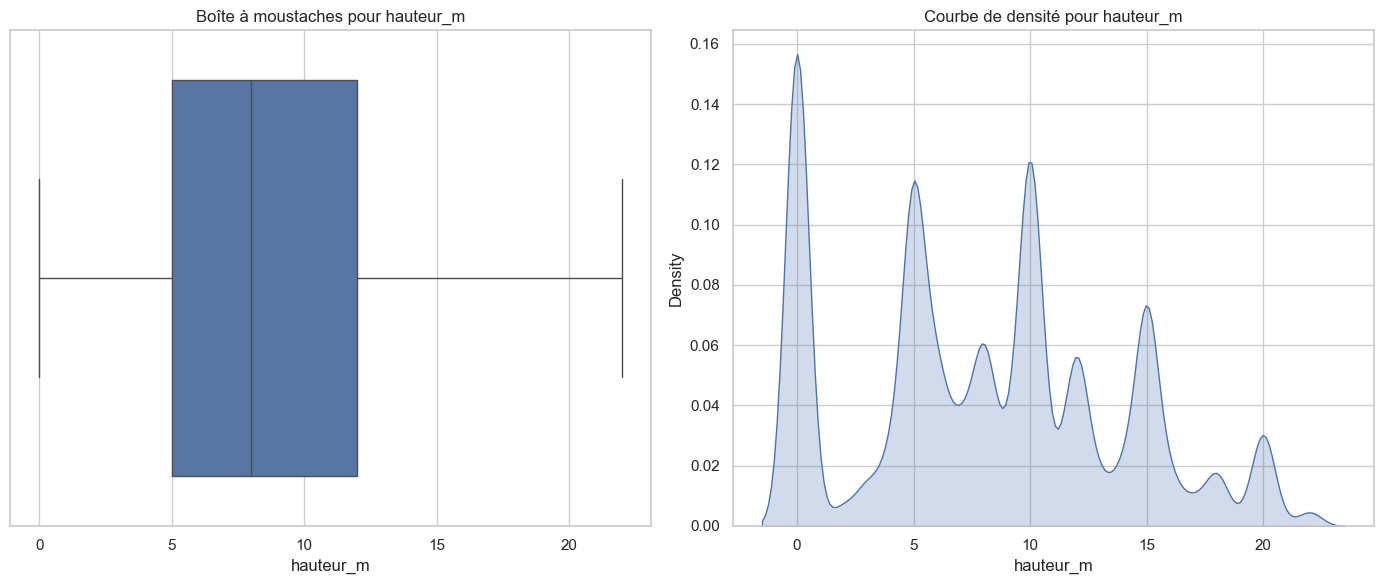

In [14]:
# Spécifier les colonnes pour la circonférence et la hauteur
columns_to_plot = ['circonference_cm', 'hauteur_m']

# Création des graphiques pour les colonnes spécifiées
for column in columns_to_plot:
    # Vérifier s'il y a des valeurs manquantes et les supprimer
    column_data_cleaned = data_cleaned[column].dropna()
    
    plt.figure(figsize=(14, 6))

    # Boîte à moustaches
    plt.subplot(1, 2, 1)
    sns.boxplot(x=column_data_cleaned)
    plt.title(f'Boîte à moustaches pour {column}')

    # Courbe de densité
    plt.subplot(1, 2, 2)
    sns.kdeplot(column_data_cleaned, fill=True)
    plt.title(f'Courbe de densité pour {column}')

    plt.tight_layout()
    plt.show()

4. Visualisation des données

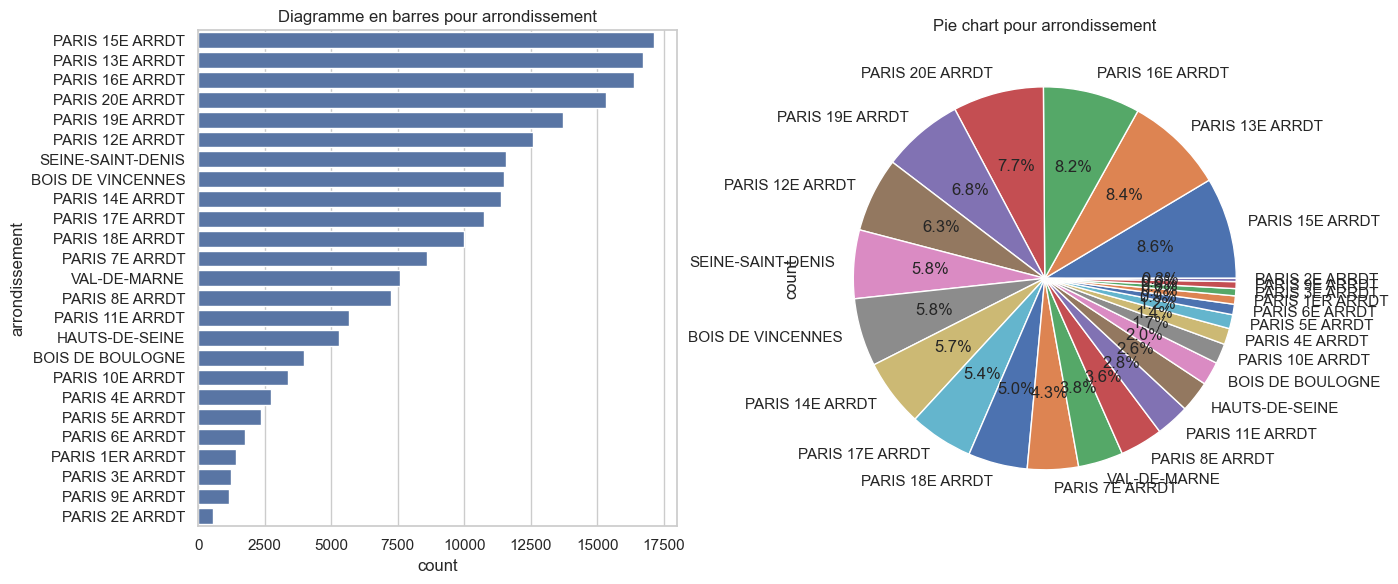

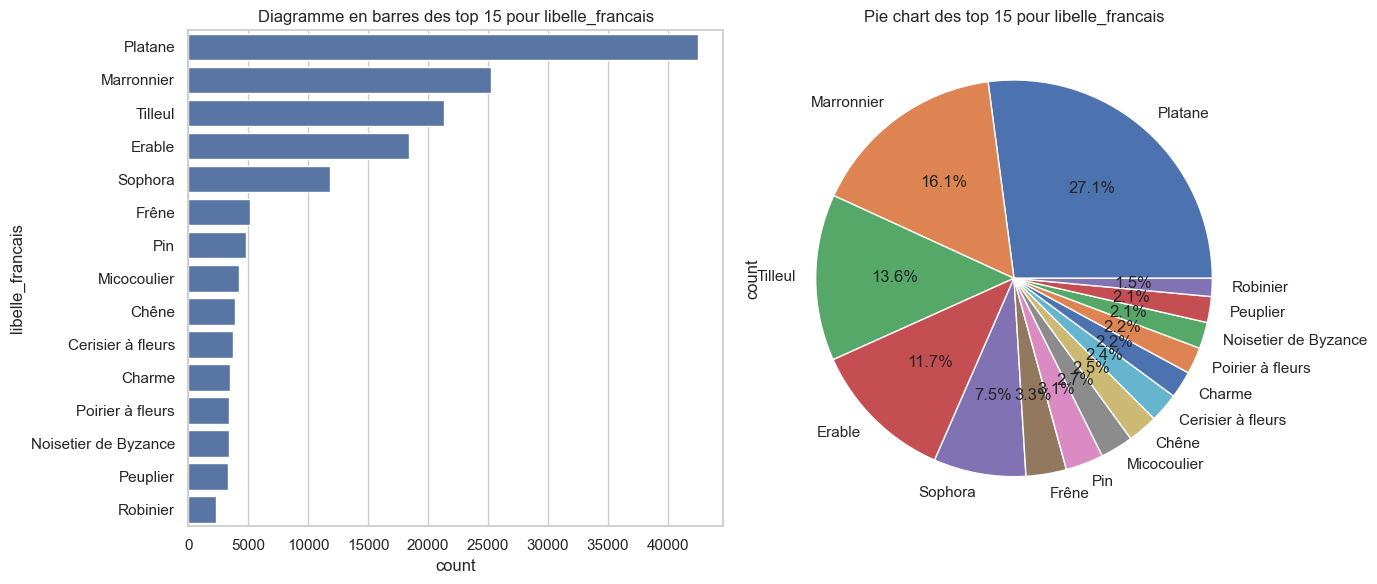

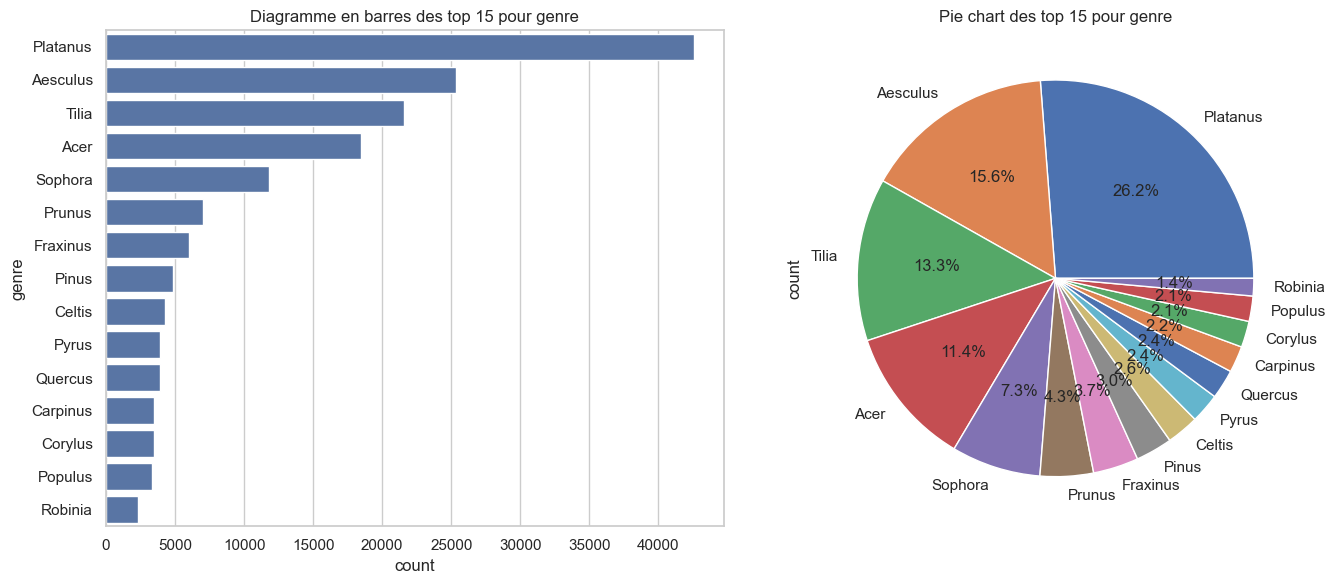

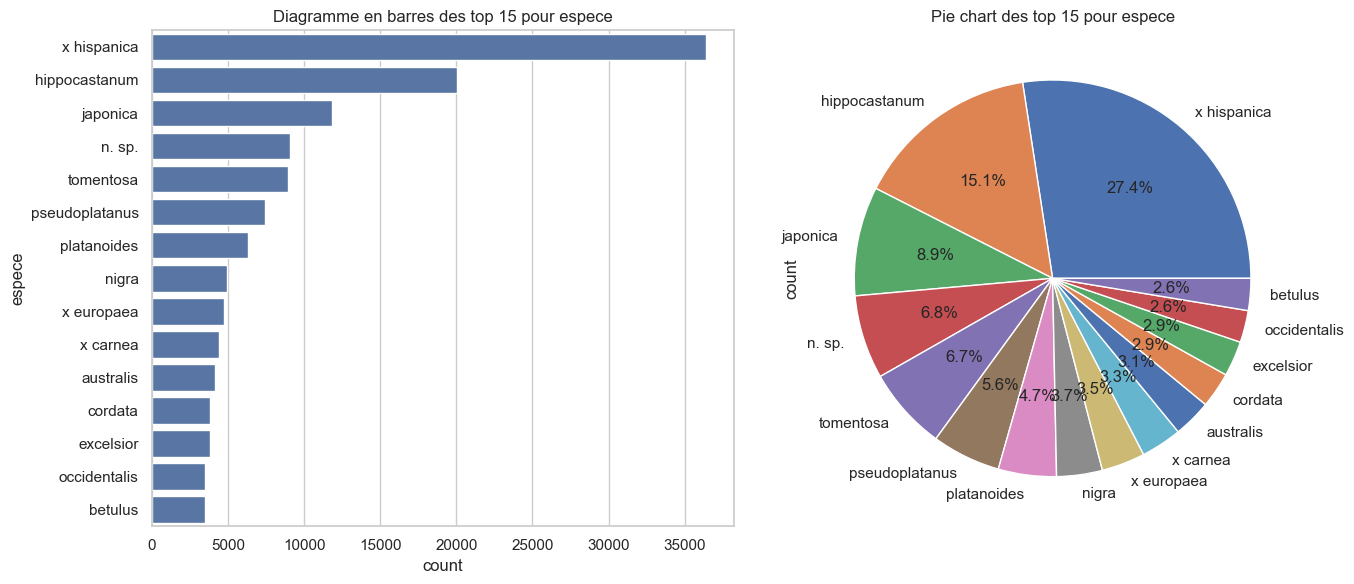

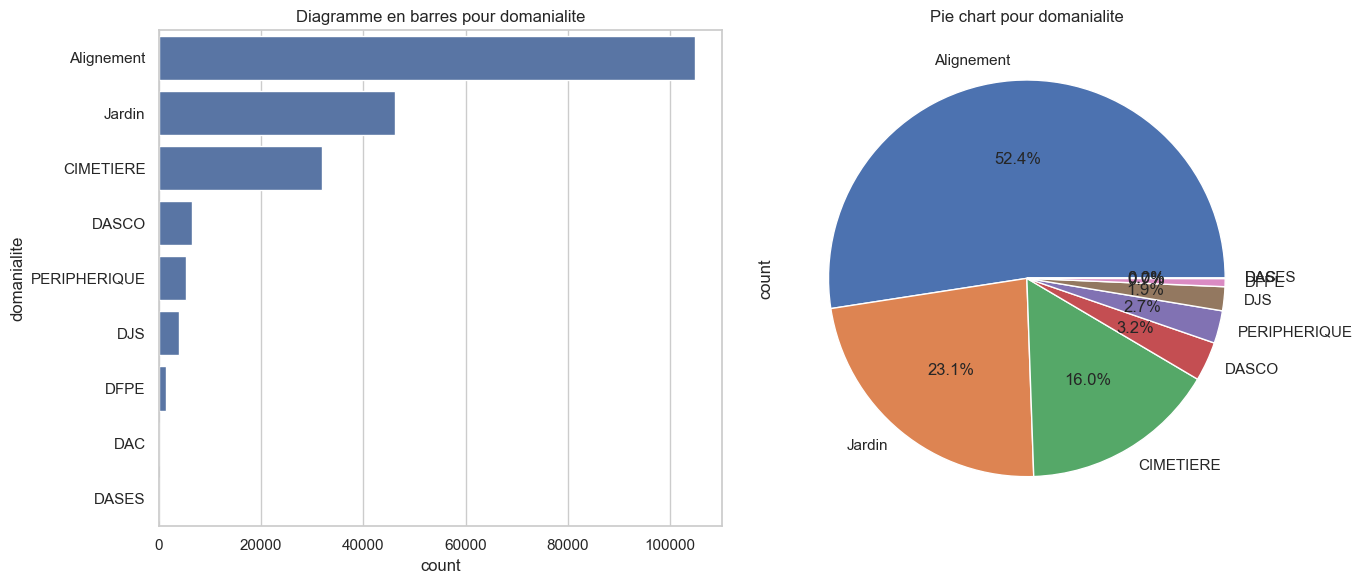

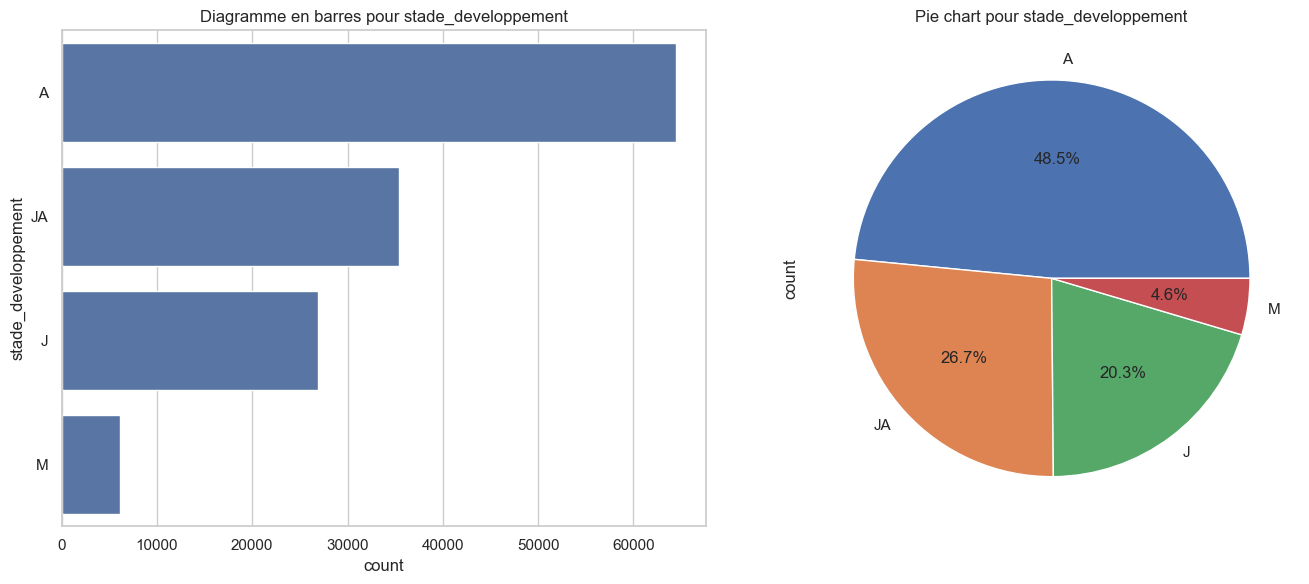

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes qualitatives, excluant la colonne 'lieu'
qualitative_columns = data_cleaned.select_dtypes(include=[object]).columns
qualitative_columns = qualitative_columns.drop('lieu')

# Colonnes à analyser complètement
columns_full_analysis = ['domanialité', 'arrondissement', 'stade_de_developpement']
# Colonnes à analyser les top 15
columns_top15 = ['libelle_francais', 'genre', 'espece']

# Fonction pour analyser une colonne avec visualisation complète
def analyze_full(column):
    plt.figure(figsize=(14, 6))

    # Diagramme en barres
    plt.subplot(1, 2, 1)
    sns.countplot(y=data_cleaned[column], order=data_cleaned[column].value_counts().index)
    plt.title(f'Diagramme en barres pour {column}')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    data_cleaned[column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie chart pour {column}')

    plt.tight_layout()
    plt.show()

# Fonction pour analyser les top 15 valeurs d'une colonne
def analyze_top15(column):
    plt.figure(figsize=(14, 6))

    # Diagramme en barres
    plt.subplot(1, 2, 1)
    top15_values = data_cleaned[column].value_counts().nlargest(15).index
    sns.countplot(y=data_cleaned[column], order=top15_values)
    plt.title(f'Diagramme en barres des top 15 pour {column}')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    data_cleaned[column].value_counts().nlargest(15).plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie chart des top 15 pour {column}')

    plt.tight_layout()
    plt.show()

# Analyse des colonnes avec visualisation complète
for column in columns_full_analysis:
    if column in qualitative_columns:
        analyze_full(column)

# Analyse des top 15 valeurs pour les colonnes spécifiques
for column in columns_top15:
    if column in qualitative_columns:
        analyze_top15(column)

# Autres colonnes qualitatives restantes, après avoir exclu les colonnes analysées
columns_to_exclude = set(columns_full_analysis + columns_top15 + ['remarquable'])
other_columns = [col for col in qualitative_columns if col not in columns_to_exclude]

# Analyse des autres colonnes qualitatives restantes
for column in other_columns:
    analyze_full(column)


In [16]:
import folium
import pandas as pd
from IPython.display import IFrame
# Prendre un échantillon aléatoire de 1% des données
sampled_data = data_cleaned.sample(frac=0.01, random_state=1)

# Coordonnées pour centrer la carte (par exemple, Paris)
center_coords = (48.8566, 2.3522)

# Initialisation de la carte Folium
ma_carte = folium.Map(location=center_coords, zoom_start=12)

# Ajouter des marqueurs à la carte à partir de l'échantillon
for index, row in sampled_data.iterrows():
    folium.Marker([row['geo_point_2d_a'], row['geo_point_2d_b']],
                  popup=row['libelle_francais']).add_to(ma_carte)

# Enregistrer la carte dans un fichier HTML
ma_carte.save('ma_carte.html')

# Afficher la carte dans le Jupyter Notebook
IFrame(src='ma_carte.html', width=700, height=600)

5. Synthèse et propositions

Pour optimiser la tournée d'une équipe d'agents d'entretien d'arbres, nous allons suivre plusieurs étapes :

1) Analyser les besoins d'entretien des différents types d'arbres : chaque type d'arbre peut avoir des besoins d'entretien spécifiques en fonction de son âge, sa hauteur et sa circonférence.
2) Catégoriser les arbres selon leurs besoins d'entretien : diviser les arbres en groupes basés sur leurs caractéristiques communes et leurs besoins.
3) Planifier la tournée des équipes d'entretien : répartir les travaux d'entretien entre plusieurs groupes d'agents, en tenant compte de la proximité géographique des arbres et de la charge de travail.

Étape 1 : Analyser les besoins d'entretien des différents types d'arbres

Voici une liste des types d'entretien courants en fonction des caractéristiques des arbres :

    Élagage : pour contrôler la taille et la forme de l'arbre.
    Traitement phytosanitaire : pour prévenir ou traiter les maladies et parasites.
    Arrosage : pour les jeunes arbres ou en période de sécheresse.
    Fertilisation : pour assurer une croissance saine.
    Enlèvement des branches mortes : pour la sécurité et la santé de l'arbre.

    La circonférence donne un indication de la taille et de la robustesse de l'arbre. Les arbres avec une grande circonférence peuvent nécessiter des équipements spécifiques pour l'élagage. Il faut utiliser la conférence pour planifier le type d'équipement nécessaire et le temps estimé pour l'entretien.

    La hauteur de l'arbre est importante pour évaluer les risques potentiels et pour planifier les méthodes d'élagage. Il faut classifier les arbres par hauteur pour assigner les agents avec des compétences et les équipements appropriés. 

    Le stade de développement indique les besoins spécifiques en soins et en traitement. Il faut identifier le stade de développement pour adapter les interventions.

Étape 2 : Catégoriser les arbres selon leurs besoins d'entretien

    Arbres nécessitant un élagage fréquent : platane, marronnier, tilleul, érable, sophora, frêne, micocoulier, chêne, cerisier à fleurs.
    Arbres nécessitant des traitements phytosanitaires fréquents : platane (maladie du chancre coloré), marronnier (mineuse du marronnier), peuplier (rouille), robinier (acarien du robinier).
    Arbres nécessitant un arrosage fréquent (jeunes arbres ou arbres en zones sèches) : pin, poirier à fleurs, noisetier de Byzance.
    Arbres nécessitant une fertilisation régulière : charme, chêne, cerisier à fleurs, noisetier de Byzance.

Étape 3 : Planifier la tournée des équipes d'entretien

Pour répartir les travaux d'entretien, nous allons diviser les arbres en 4 groupes basés sur le type d'entretien nécessaire.

Groupe 1 : Élagage fréquent

    Platane
    Marronnier
    Tilleul
    Érable
    Sophora
    Frêne
    Micocoulier
    Chêne
    Cerisier à fleurs

    de circonférence 51-100 cm
    de hauteur 6-15 m
    stade de développement jeune adulte, adulte, mature

Groupe 2 : Traitements phytosanitaires fréquents

    Platane
    Marronnier
    Peuplier
    Robinier

    de circonférence 51-100 cm
    de hauteur 0-15 m
    stade de développement jeune adulte, adulte, mature

Groupe 3 : Arrosage fréquent

    Pin
    Poirier à fleurs
    Noisetier de Byzance

    de circonférence 0-50 cm
    de hauteur 0-5 m
    stade de développement jeune

Groupe 4 : Fertilisation régulière

    Charme
    Chêne
    Cerisier à fleurs
    Noisetier de Byzance

    circonférence de 0-100 cm
    hauteur de 0-15 m
    stade de développement jeune, jeune adulte, adulte

Groupe 5 : arbres matures et remarquables 
    Chène
    Platane
    Marronnier
    Micocoulier

    circonférence + 100 cm
    hauteur + 15 m
    stade de développement Mature
    Remarquables : oui

Scénario d'organisation pour les équipes d'entretien

    Répartition géographique et par tâches
    
    Découper la zone géographique en plusieurs divisions que vont se répartir les équipes de la mairie de Paris, selon leurs effectifs.

    Dans chacune de ces zones géographiques, il y a plusieurs équipes d'agents d'entretien :
    
        Équipe 1 et 2 : Élagage et traitement phytosanitaire : Ces équipes s'occupent à la fois de l'élagage et des traitements phytosanitaires pour équilibrer la charge de travail.
        Équipe 3 : Arrosage et fertilisation : Cette équipe gère l'arrosage et la fertilisation des arbres nécessitant ces soins.
        Équipe 4 : Interventions d'urgence et divers soins : Cette équipe est disponible pour les interventions d'urgence (branches cassées, arbres malades) et peut également soutenir les autres équipes selon les besoins. Enfin, elle gère les arbres remarquables.

Conclusion

Pour optimiser la tournée des agents d'entretien, il est important de :

    Analyser et comprendre les besoins spécifiques de chaque type d'arbre.
    Répartir les travaux en tenant compte des tâches à effectuer et de la répartition géographique des arbres.
    Ajuster les équipes en fonction des saisons et des besoins fluctuants des arbres (ex. période de taille, saison des maladies).

En suivant cette méthode, vous pourrez améliorer l'efficacité et l'organisation des tournées des équipes d'entretien d'arbres.